<a href="https://colab.research.google.com/github/EmmaGiussani/Nuclear-Physics/blob/main/1_AbbondanzaIsotopica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abbondanza isotopica

Un campione di materiale è composto da Molibdeno (Mo) naturale. Contiene cioè tutti gli isotopi del Molibdeno con un'abbondanza isotopica pari a quella presente in natura.

1. Determinare il peso atomico standard del Molibdeno

2. Determinare il numero di nuclei presenti in 1 g di questo campione

3. Se il campione fosse composto da materiale arricchito al 90% in $^{100}$Mo come cambierebbe il peso atomico?

4. Quanto materiale con abbondanza isotopica naturale è necessario per avere un campione di 1 g di $^{100}$Mo arricchito al 90%?

5. Effettuare le stesse considerazioni nel caso di un campione di Ferro (Fe) e arricchimento in $^{57}$Fe

## 1. Peso atomico standard di un campione con abbondanza naturale

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.0/175.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.8/865.8 kB 11.6 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.29
    Uninstalling SQLAlchemy-2.0.29:
      Successfully uninstalled SQLAlchemy-2.0.29
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.52 which is incompatible.


Text(0, 0.5, 'Abbondanza Isotopica')

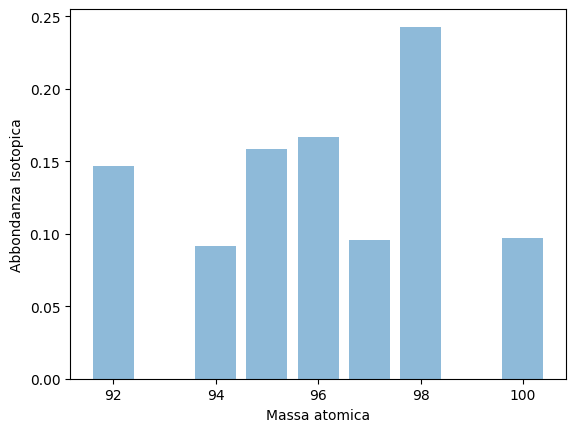

In [ ]:
!pip install mendeleev==0.7.0  # Se non è già presente bisogna prima installare il pacchetto mendeleev con il comando '!pip install mendeleev' - Basta quindi rimuovere il # iniziale

import numpy as np
from mendeleev import element

Elem = element('Mo')                         # Indicare qui l'elemento che si vuole utilizzare

Isot = len(Elem.isotopes)                    # Mi faccio dire quanti isotopi ci sono per l'elemento selezionato

Abb = np.empty(Isot)                         # Creo degli array vuoti nei quali metterò l'abbondanza isotopica e la massa degli isotopi
MassN = np.empty(Isot)

i = 0
for iso in Elem.isotopes:                    # Riempio gli array
     #print(iso)
     Abb[i] = Elem.isotopes[i].abundance
     MassN[i] = Elem.isotopes[i].mass_number
     i+=1

from matplotlib import pyplot as plt

plt.bar(MassN, Abb, alpha=0.5)
plt.xlabel('Massa atomica')
plt.ylabel('Abbondanza Isotopica')

Nel pacchetto [Mendeleev](https://mendeleev.readthedocs.io/en/stable/data.html) ci sono in realtà molte altre informazioni, ad esempio....

In [ ]:
print('Raggio atomico',Elem.atomic_radius, 'pm')
print('Densità',Elem.density, 'g/cm^3')
print('Anno di scoperta:', Elem.discovery_year, '\n...')


Raggio atomico 145.0 pm
Densità 10.22 g/cm^3
Anno di scoperta: 1778 
...


### Calcolo peso atomico standard

In [ ]:
atomic_mass = np.nansum(Abb*MassN)
print('Peso atomico calcolato = {:.1f}'.format(atomic_mass))

Peso atomico calcolato = 96.0


In realtà il peso atomico è un valore già contenuto nel pachetto Mendeleev....

In [ ]:
print('Peso atomico tabulato = {:.1f}'.format(Elem.atomic_weight))

Peso atomico tabulato = 96.0


p.s.: In alcuni casi ci possono essere delle piccole differenze tra i valori calcolati e quelli tabulati dovute ai diversi database utilizzati...

## 2. Calcolo del numero di atomi presenti in 1 g di materiale

In [ ]:
M = 1                # Massa del materiale [g]
N_A = 6.022*10**23   # Numero di Avogadro - 6.022*10^23 mol^(-1)

N = M/atomic_mass*N_A
print('Numero di isotopi presenti nel campione = {:.1e}'.format(N))


Numero di isotopi presenti nel campione = 6.3e+21


## 3. Arricchimento del 90% in $^{100}Mo$

In [ ]:
Isot = 100           # Numero di massa dell'isotopo arricchito
arr = 0.9            # Percentuale arricchimento
Abb_arr = np.empty(i)

p = np.where(MassN == Isot)

i = 0
for iso in Elem.isotopes:
    if i != p :
        Abb_arr[i] = (Abb[i]+Abb[i]*Abb[p])*(1-arr)
    Abb_arr[p] = arr
    i+=1
# print('{:.5f}'.format(np.nansum(Abb_arr)))

<ipython-input-6-e880d6cd2ac1>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Abb_arr[i] = (Abb[i]+Abb[i]*Abb[p])*(1-arr)


Text(0, 0.5, 'Abbondanza Isotopica')

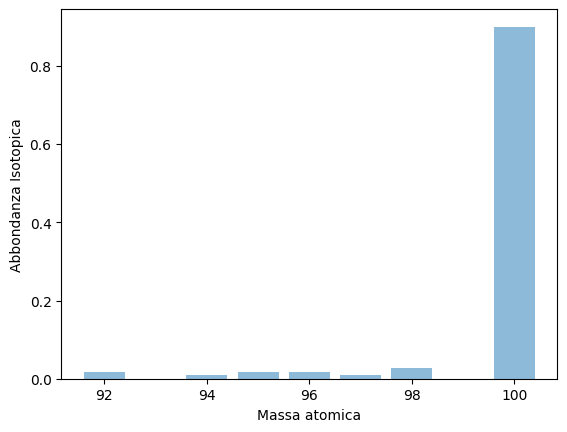

In [ ]:
plt.bar(MassN, Abb_arr, alpha=0.5)
plt.xlabel('Massa atomica')
plt.ylabel('Abbondanza Isotopica')

In [ ]:
atomic_mass_arr = np.nansum(Abb_arr*MassN)
print('Peso atomico calcolato = {:.1f}'.format(atomic_mass_arr))

Peso atomico calcolato = 99.5


In [ ]:
N_arr = M/atomic_mass_arr*N_A
print('Numero di nuclei presenti nel campione arricchito al 90% = {:.1e}'.format(N_arr))
print('Ricordiamo che numero di nuclei presenti nel campione con abbondanza isotopica naturale era= {:.1e}'.format(N))
print('\nNaturalmente ciò che cambia maggiormente è il numero di nuclei dell\'isotopo in cui è stato arricchito il campione:')
print('Numero di nuclei di 100Mo nel campione arricchito = {:.1e}'.format(N_arr*Abb_arr[int(p[0])]))
print('Numero di nuclei di 100Mo nel campione naturale = {:.1e}'.format(N_arr*Abb[int(p[0])]))

Numero di nuclei presenti nel campione arricchito al 90% = 6.1e+21
Ricordiamo che numero di nuclei presenti nel campione con abbondanza isotopica naturale era= 6.3e+21

Naturalmente ciò che cambia maggiormente è il numero di nuclei dell'isotopo in cui è stato arricchito il campione:
Numero di nuclei di 100Mo nel campione arricchito = 5.4e+21
Numero di nuclei di 100Mo nel campione naturale = 5.9e+20


<ipython-input-9-08860536af10>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Numero di nuclei di 100Mo nel campione arricchito = {:.1e}'.format(N_arr*Abb_arr[int(p[0])]))
<ipython-input-9-08860536af10>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Numero di nuclei di 100Mo nel campione naturale = {:.1e}'.format(N_arr*Abb[int(p[0])]))


## 4. Quanto materiale con abbondanza isotopica naturale è necessario per avere un campione di 1 g di $^{100}$Mo arricchito al 90%?

In [ ]:
r = Abb[int(p[0])]/Abb_arr[int(p[0])]             # Calcolo il rapporto tra l'abbondanza naturale e l'arricchimento
print('La massa di materiale iniziale deve essere = {:.1f}'.format(M/r), 'g' )

La massa di materiale iniziale deve essere = 9.2 g


<ipython-input-10-323fcea415b2>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  r = Abb[int(p[0])]/Abb_arr[int(p[0])]             # Calcolo il rapporto tra l'abbondanza naturale e l'arricchimento


## 5. Effettuare le stesse considerazioni nel caso di un campione di Ferro (Fe) e arricchimento in  57 Fe

E' sufficiente rifare lo stesso processo ricordandosi di cambiare oltre all'elemento (Mo -> Fe) anche l'isotopo preso in considerazione (100 -> 57)

--------------------------------------------------------------------------------------------

## Per chi è interessato può anche crearsi la propria tavola degli elementi....

In [ ]:
#!pip install bokeh
from bokeh.plotting import output_notebook, output_file
output_notebook()
from mendeleev.fetch import fetch_table
from mendeleev.plotting import periodic_plot
ptable = fetch_table('elements')
periodic_plot(ptable)